## Observations and Insights 

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#print(mouse_metadata)
#print(study_results)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [42]:
# Checking the number of mice.
combined_df["Mouse ID"].nunique()

249

In [43]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#find_duplicates = combined_df.groupby(['Mouse ID', 'Timepoint'])
combined_df[combined_df.duplicated(['Mouse ID','Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [44]:
# find all data realated to duplicated mouse id
combined_df[combined_df['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [45]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'] != 'g989']
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [46]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_df["Drug Regimen"].value_counts()


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

In [48]:
# capomulin stats
capomulin_df = clean_df[clean_df['Drug Regimen'] == "Capomulin"] 
capomulin = capomulin_df["Tumor Volume (mm3)"]
capomulin_mean = np.mean(capomulin)
capomulin_median = np.median(capomulin)
capomulin_var = np.var(capomulin)
capomulin_sdev = np.std(capomulin)
capomulin_sem = st.sem(capomulin)

capomulin_summary = [{"Drug Name": "capomulin", "Mean": capomulin_mean, "Median": capomulin_median, 
                   "Variance": capomulin_var, "Standard Deviation": capomulin_sdev,
                   "SEM": capomulin_sem}]
capomulin_summary_df = pd.DataFrame(capomulin_summary)
print(capomulin_summary_df)

   Drug Name       Mean     Median   Variance  Standard Deviation       SEM
0  capomulin  40.675741  41.557809  24.839296            4.983904  0.329346


In [49]:
# ramicane stats
ramicane_df = clean_df[clean_df['Drug Regimen'] == "Ramicane"] 
ramicane = ramicane_df["Tumor Volume (mm3)"]
ramicane_mean = np.mean(ramicane)
ramicane_median = np.median(ramicane)
ramicane_var = np.var(ramicane)
ramicane_sdev = np.std(ramicane)
ramicane_sem = st.sem(ramicane)

ramicane_summary = [{"Drug Name": "ramicane", "Mean": ramicane_mean, "Median": ramicane_median, 
                   "Variance": ramicane_var, "Standard Deviation": ramicane_sdev,
                   "SEM": ramicane_sem}]
ramicane_summary_df = pd.DataFrame(ramicane_summary)
print(ramicane_summary_df)

  Drug Name       Mean     Median   Variance  Standard Deviation       SEM
0  ramicane  40.216745  40.673236  23.383692            4.835669  0.320955


In [50]:
# ketapril stats
ketapril_df = clean_df[clean_df['Drug Regimen'] == "Ketapril"] 
ketapril = ketapril_df["Tumor Volume (mm3)"]
ketapril_mean = np.mean(ketapril)
ketapril_median = np.median(ketapril)
ketapril_var = np.var(ketapril)
ketapril_sdev = np.std(ketapril)
ketapril_sem = st.sem(ketapril)

ketapril_summary = [{"Drug Name": "ketapril", "Mean": ketapril_mean, "Median": ketapril_median, 
                   "Variance": ketapril_var, "Standard Deviation": ketapril_sdev,
                   "SEM": ketapril_sem}]
ketapril_summary_df = pd.DataFrame(ketapril_summary)
print(ketapril_summary_df)

  Drug Name       Mean     Median  Variance  Standard Deviation      SEM
0  ketapril  55.235638  53.698743  68.18893            8.257659  0.60386


In [51]:
# naftisol stats
naftisol_df = clean_df[clean_df['Drug Regimen'] == "Naftisol"] 
naftisol = naftisol_df["Tumor Volume (mm3)"]
naftisol_mean = np.mean(naftisol)
naftisol_median = np.median(naftisol)
naftisol_var = np.var(naftisol)
naftisol_sdev = np.std(naftisol)
naftisol_sem = st.sem(naftisol)

naftisol_summary = [{"Drug Name": "naftisol", "Mean": naftisol_mean, "Median": naftisol_median, 
                   "Variance": naftisol_var, "Standard Deviation": naftisol_sdev,
                   "SEM": naftisol_sem}]
naftisol_summary_df = pd.DataFrame(naftisol_summary)
print(naftisol_summary_df)

  Drug Name       Mean     Median   Variance  Standard Deviation       SEM
0  naftisol  54.331565  52.509285  65.817708            8.112811  0.596466


In [52]:
# zoniferol stats
zoniferol_df = clean_df[clean_df['Drug Regimen'] == "Zoniferol"] 
zoniferol = zoniferol_df["Tumor Volume (mm3)"]
zoniferol_mean = np.mean(zoniferol)
zoniferol_median = np.median(zoniferol)
zoniferol_var = np.var(zoniferol)
zoniferol_sdev = np.std(zoniferol)
zoniferol_sem = st.sem(zoniferol)

zoniferol_summary = [{"Drug Name": "zoniferol", "Mean": zoniferol_mean, "Median": zoniferol_median, 
                   "Variance": zoniferol_var, "Standard Deviation": zoniferol_sdev,
                   "SEM": zoniferol_sem}]
zoniferol_summary_df = pd.DataFrame(zoniferol_summary)
print(zoniferol_summary_df)

   Drug Name       Mean     Median   Variance  Standard Deviation       SEM
0  zoniferol  53.236507  51.818479  48.266689            6.947423  0.516398


In [53]:
# placebo stats
placebo_df = clean_df[clean_df['Drug Regimen'] == "Placebo"] 
placebo = placebo_df["Tumor Volume (mm3)"]
placebo_mean = np.mean(placebo)
placebo_median = np.median(placebo)
placebo_var = np.var(placebo)
placebo_sdev = np.std(placebo)
placebo_sem = st.sem(placebo)

placebo_summary = [{"Drug Name": "placebo", "Mean": placebo_mean, "Median": placebo_median, 
                   "Variance": placebo_var, "Standard Deviation": placebo_sdev,
                   "SEM": placebo_sem}]
placebo_summary_df = pd.DataFrame(placebo_summary)
print(placebo_summary_df)

  Drug Name       Mean     Median   Variance  Standard Deviation       SEM
0   placebo  54.033581  52.288934  60.830138            7.799368  0.581331


In [54]:
# stelasyn stats
stelasyn_df = clean_df[clean_df['Drug Regimen'] == "Stelasyn"] 
stelasyn = stelasyn_df["Tumor Volume (mm3)"]
stelasyn_mean = np.mean(stelasyn)
stelasyn_median = np.median(stelasyn)
stelasyn_var = np.var(stelasyn)
stelasyn_sdev = np.std(stelasyn)
stelasyn_sem = st.sem(stelasyn)

stelasyn_summary = [{"Drug Name": "stelasyn", "Mean": stelasyn_mean, "Median": stelasyn_median, 
                   "Variance": stelasyn_var, "Standard Deviation": stelasyn_sdev,
                   "SEM": stelasyn_sem}]
stelasyn_summary_df = pd.DataFrame(stelasyn_summary)
print(stelasyn_summary_df)

  Drug Name       Mean     Median   Variance  Standard Deviation       SEM
0  stelasyn  54.233149  52.431737  59.122106             7.68909  0.573111


In [55]:
# infubinol stats
infubinol_df = clean_df[clean_df['Drug Regimen'] == "Infubinol"] 
infubinol = infubinol_df["Tumor Volume (mm3)"]
infubinol_mean = np.mean(infubinol)
infubinol_median = np.median(infubinol)
infubinol_var = np.var(infubinol)
infubinol_sdev = np.std(infubinol)
infubinol_sem = st.sem(infubinol)

infubinol_summary = [{"Drug Name": "infubinol", "Mean": infubinol_mean, "Median": infubinol_median, 
                   "Variance": infubinol_var, "Standard Deviation": infubinol_sdev,
                   "SEM": infubinol_sem}]
infubinol_summary_df = pd.DataFrame(infubinol_summary)
print(infubinol_summary_df)

   Drug Name       Mean     Median   Variance  Standard Deviation       SEM
0  infubinol  52.884795  51.820584  42.886388             6.54877  0.492236


In [56]:
# ceftamin stats
ceftamin_df = clean_df[clean_df['Drug Regimen'] == "Ceftamin"] 
ceftamin = ceftamin_df["Tumor Volume (mm3)"]
ceftamin_mean = np.mean(ceftamin)
ceftamin_median = np.median(ceftamin)
ceftamin_var = np.var(ceftamin)
ceftamin_sdev = np.std(ceftamin)
ceftamin_sem = st.sem(ceftamin)

ceftamin_summary = [{"Drug Name": "ceftamin", "Mean": ceftamin_mean, "Median": ceftamin_median, 
                   "Variance": ceftamin_var, "Standard Deviation": ceftamin_sdev,
                   "SEM": ceftamin_sem}]
ceftamin_summary_df = pd.DataFrame(ceftamin_summary)
print(ceftamin_summary_df)

  Drug Name       Mean     Median   Variance  Standard Deviation       SEM
0  ceftamin  52.591172  51.776157  39.069446            6.250556  0.469821


In [57]:
# propriva stats
propriva_df = clean_df[clean_df['Drug Regimen'] == "Propriva"] 
propriva = propriva_df["Tumor Volume (mm3)"]
propriva_mean = np.mean(propriva)
propriva_median = np.median(propriva)
propriva_var = np.var(propriva)
propriva_sdev = np.std(propriva)
propriva_sem = st.sem(propriva)

propriva_summary = [{"Drug Name": "propriva", "Mean": propriva_mean, "Median": propriva_median, 
                   "Variance": propriva_var, "Standard Deviation": propriva_sdev,
                   "SEM": propriva_sem}]
propriva_summary_df = pd.DataFrame(propriva_summary)
print(propriva_summary_df)

  Drug Name      Mean     Median   Variance  Standard Deviation       SEM
0  propriva  52.32093  50.446266  43.555716            6.599675  0.544332


In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
frames = [capomulin_summary_df, ramicane_summary_df, ketapril_summary_df, naftisol_summary_df, 
          zoniferol_summary_df, stelasyn_summary_df, placebo_summary_df, infubinol_summary_df,
          ceftamin_summary_df, propriva_summary_df]
summary_table = pd.concat(frames)
summary_table

,Drug Name,Mean,Median,Variance,Standard Deviation,SEM
0,capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
0,ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
0,ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
0,naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
0,zoniferol,53.236507,51.818479,48.266689,6.947423,0.516398
0,stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111
0,placebo,54.033581,52.288934,60.830138,7.799368,0.581331
0,infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
0,ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
0,propriva,52.320930,50.446266,43.555716,6.599675,0.544332


## Bar and Pie Charts

Text(0, 0.5, 'No. of Measurements')

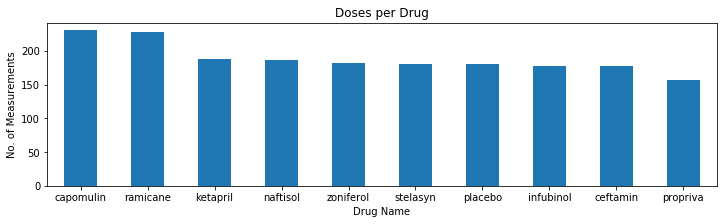

In [59]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
summary_table["No. of Measurements"] = [230, 228, 188, 186, 182, 181, 181, 178, 178, 156]
panda_plot = summary_table[["Drug Name", "No. of Measurements"]].plot(title = "Doses per Drug", legend = False,
                                                                      kind="bar", figsize=(12,3))
panda_plot.set_xticklabels(summary_table["Drug Name"], rotation=0)
panda_plot.set_xlabel("Drug Name")
panda_plot.set_ylabel("No. of Measurements")


Text(0.5, 1.0, 'Doses per Drug')

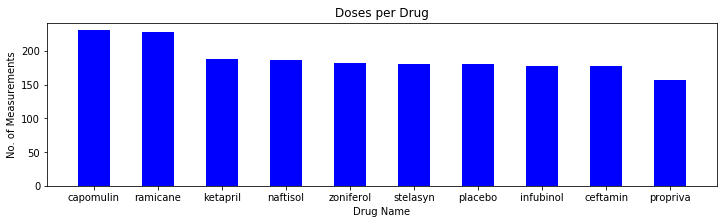

In [60]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = summary_table["Drug Name"]
y_axis = summary_table["No. of Measurements"]
plt.figure(figsize=(12,3))
plt.bar(x_axis, y_axis, color='b', width=0.5)
plt.xlabel("Drug Name")
plt.ylabel("No. of Measurements")
plt.title("Doses per Drug")

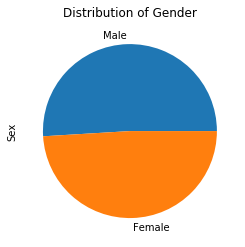

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_data = clean_df["Sex"].value_counts()
pie_plot = sex_data.plot(kind = 'pie', title = 'Distribution of Gender')

Text(0.5, 1.0, 'Distribution of Gender')

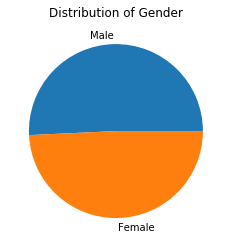

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
count = [958, 930]
colors = ["tab:blue", "tab:orange"]
plt.pie(count, labels=labels, colors=colors)
plt.title("Distribution of Gender")

## Quartiles, Outliers and Boxplots

In [77]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_df = clean_df.groupby('Mouse ID').max().Timepoint.reset_index()

In [85]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cleaner_df = mouse_df.merge(clean_df, on=['Mouse ID','Timepoint'])
cleaner_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [88]:
#Did above and dropped other 6 drug regimens here.
best_df = cleaner_df[(cleaner_df['Drug Regimen'] == 'Capomulin') | (cleaner_df['Drug Regimen'] == 'Ramicane')
                     | (cleaner_df['Drug Regimen'] == 'Infubinol') | (cleaner_df['Drug Regimen'] == 'Ceftamin')]
best_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [98]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in "Drug Regimen":
    tumor_data.append(best_df["Tumor Volume (mm3)"])
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

[0      67.973419
 1      65.525743
 3      62.999356
 6      38.407618
 7      43.047543
          ...    
 238    68.594745
 239    31.896238
 240    64.729837
 244    30.638696
 245    62.754451
 Name: Tumor Volume (mm3), Length: 100, dtype: float64,
 0      67.973419
 1      65.525743
 3      62.999356
 6      38.407618
 7      43.047543
          ...    
 238    68.594745
 239    31.896238
 240    64.729837
 244    30.638696
 245    62.754451
 Name: Tumor Volume (mm3), Length: 100, dtype: float64,
 0      67.973419
 1      65.525743
 3      62.999356
 6      38.407618
 7      43.047543
          ...    
 238    68.594745
 239    31.896238
 240    64.729837
 244    30.638696
 245    62.754451
 Name: Tumor Volume (mm3), Length: 100, dtype: float64,
 0      67.973419
 1      65.525743
 3      62.999356
 6      38.407618
 7      43.047543
          ...    
 238    68.594745
 239    31.896238
 240    64.729837
 244    30.638696
 245    62.754451
 Name: Tumor Volume (mm3), Length: 100, 

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
